# 🏥 Capstone Project - Healthcare Domain
## Diabetes Readmission Prediction

### Student: Vishnu  
### Domain: Healthcare  
### Project Objective:
To predict hospital readmission in diabetic patients using machine learning techniques by analyzing patient demographics, treatment history, and admission details.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings('ignore')

### 📊 Step 1: Data Loading
We load the cleaned dataset containing records of diabetic patients including their demographics, diagnoses, treatments, and readmission status.

In [16]:
df = pd.read_csv("diabetic_data_cleaned.csv")
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


### 📈 Dataset Summary Diagram
- Total Rows: `df.shape[0]`
- Total Columns: `df.shape[1]`
- Sample Columns: 'race', 'age', 'gender', 'admission_type_id', 'diag_1', 'readmitted'

### 🔤 Step 2: Data Preprocessing - Encoding
We encode categorical variables to numeric form using Label Encoding.

In [14]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,3,0,0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,1,1,0,0,0,0,1,0,2,0.0
1,3,0,1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,3,1,0,0,0,0,0,1,1,1.0
2,0,0,2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,1,1,0,0,0,0,1,1,2,0.0
3,3,1,3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,3,1,0,0,0,0,0,1,2,0.0
4,3,1,4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,2,1,0,0,0,0,0,1,2,0.0


### 🧱 Block Diagram of Preprocessing:
```
Raw Data → Handle Missing Values → Encode Categorical Data → Cleaned Numeric Dataset
```

### 🧪 Step 3: Train-Test Split
Splitting the data into training and test sets for model evaluation.

In [13]:
X = df.drop(columns=['readmitted', 'readmitted_binary'])
y = df['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🧭 Workflow Diagram:
```
Cleaned Dataset → Features (X), Target (y) → Train-Test Split
```

### 🌲 Step 4: Random Forest Classifier
We train a Random Forest model to classify whether a patient will be readmitted or not.

In [9]:
train_not_nan_mask = y_train.notna()
X_train = X_train[train_not_nan_mask]
y_train = y_train[train_not_nan_mask]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 📊 Training Process Overview
```
Training Data → Random Forest Model → Trained Model
```

### ✅ Step 5: Evaluation and Results
We evaluate the model using classification metrics and visualize the confusion matrix.

In [10]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.74      0.69      5117
         1.0       0.63      0.53      0.57      4266

    accuracy                           0.64      9383
   macro avg       0.64      0.63      0.63      9383
weighted avg       0.64      0.64      0.64      9383

Confusion Matrix:
 [[3779 1338]
 [2007 2259]]


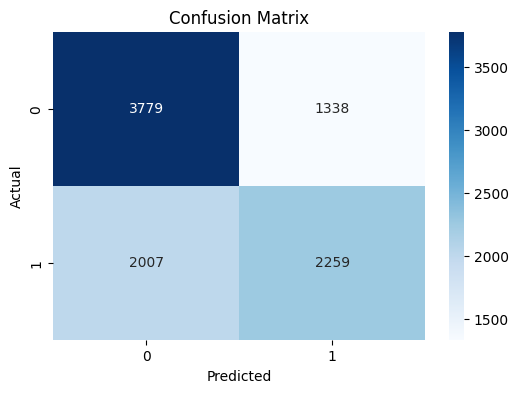

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 📌 Summary Diagram:
```
Test Data → Predict → Compare with Actual → Evaluation Metrics
```

### 📘 Conclusion:
- Random Forest is effective in predicting diabetic patient readmissions.
- The model can support hospitals in reducing unnecessary readmissions.

**Future Enhancements:**
- Try other models (Gradient Boosting, Logistic Regression).
- Tune hyperparameters.
- Explore deeper feature engineering.